# The Value of a Used Car

1. The problem :

    Predicting the Value of a Used Vehicle.

2. Who might care:

    a. Individual Buyers : Whoever interested in buying a new car wonders about the actual value of the specific car with the one which was asked by the seller. So it is important for all to come to a better understanding of the values of the cars.

    b. Dealers : Most dealers would like to learn the value of that individual car, and determine its value later on.

    c. Individual Sellers : Most private sellers would need the value of their car since the value is not constant, it changes considering the depreciation, the repairs etc.

    d. Websites or Applications created to help private parties or dealers sell their vehicles.

    e. .....

3. Data :

    a. I would like to use the data from Kaggle Competitions. The data seems not raw. However, I have also seen an approach to the cleaning process. I will try to come up with new approaches to this.

    b. This data includes the data points/observations from 2016. I will search for methods to scrape data for 2017.

4. My approach to solve this problem:

    a. This seems to be a supervised problem.

    b. Regression, cause the dependent feature needs to be continous. However, I will combine cross-validation, GridSearch, Random Selection and etc.

    c. My dependent feature would be the value of the used cars.

    d. My independent features would be the 'name' of the car, seller type, horse power of the car, mileage, any damage or repair, gearbox (automatic or manuel), age of the car...

    e. I am thinking of dividing the data I have with 'train_test_split' feature of scikit learn. If I end up getting the data for 2017, then I would use the data from 2016 as my training data.

5. What are your deliverables? Typically, this would include code, along with a paper. **

    I will complete this project on Jupiter Notebook. First I will examine data, then wrangle the data and apply ML algorithms. Hopefully I will have learned the basic concepts of data science (Wrangling, Story Telling (EDA) and ML)

    a. Data Collection

    b. Data Wrangling

    c. EDA (Exploratory Data Analysis)

    d. Modeling

    e. Presentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

First Thing : Read your 'csv.file', explore your features.

In [2]:
df = pd.read_csv('/Users/ferideaxu/Downloads/used-cars-database/autos.csv', sep=',', header=0, index_col = 'dateCrawled',encoding = "ISO-8859-1")
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.columns

Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')

The number of Columns : 20. My target column (dependent feature or response) would be 'price' feature.

In [4]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-null obj

(None, (371528, 19))

7 features are discrete, numbers, whereas
13 features are object (string, datetime....)
Shape of the data is 371528x20
vehicleType, gearbox, model, fuelType, brand, notRepairedDamage columns have missing values

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


** As we can easily see, some nonsense data points exist 'such as' yearofRegistrain '1000', and '9999', also exist some outliers. So Data wrangling is important before applying models on the data.

In [6]:
df.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

Let us change the privat and gewerblich to English.

In [7]:
df.seller = df.seller.replace('privat', 'private')
df.seller = df.seller.replace('gewerblich','dealer')
df.seller.unique()

array(['private', 'dealer'], dtype=object)

In [8]:
df.describe(include=['object'])

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,233531,2,2,2,8,2,251,7,40,2,114,182806
top,Ford_Fiesta,private,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


As easily can be seen from the table, 2 unique values exist for 'seller, offerType, abtest, gearbox, notRepairedDamage', 8 unique values for 'vehicleType', 7 unique values for 'fuelType', 40 unique values for 'model'. Integer and DateTime features includes many different/unique data points.

In [9]:
df.offerType.unique() # This is not required and has no impact on the price
df.nrOfPictures.unique() # This has no impact on the price of the car. There is only '0' in the data.
df.abtest.unique() # Test, Control. These may also have no effect on the price.
# I will drop these features.

array(['test', 'control'], dtype=object)

----DROP THE UNNECESSARY FEATURES/COLUMNS-----

In [10]:
df_new = df.drop(['offerType','nrOfPictures', 'lastSeen','postalCode','abtest', 'monthOfRegistration','dateCreated'], axis=1)

Let's Wrangle the Data.

* Delete the duplicates.
* Get rid of the null/missing values
* Clean the outliers.

----- >>>>>>>>>>Delete the duplicates !!!

In [11]:
df_new = df_new.drop_duplicates()

print('Number of Duplicates Dropped: {}'.format(df.name.count() - df_new.name.count()))

Number of Duplicates Dropped: 11489


-------->>>>>>> Get rid of the null/missing values !!!

In [12]:
df_new.notRepairedDamage.replace(to_replace='nein', value=0, inplace=True)
df_new.notRepairedDamage.replace(to_replace='ja', value=1, inplace=True)
df_new.notRepairedDamage.fillna(value=1, inplace=True)
df_new.head()

,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
dateCrawled,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,private,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,1.0
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,1.0
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,1.0
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,0.0
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,0.0


------CLEAN THE OUTLIERS!!!!

In [13]:
yearsBool = ((df_new.yearOfRegistration <= 2016) & (df_new.yearOfRegistration >= 1970))

priceBool = ((df_new.price <= 100000) & (df_new.price >= 250))

powerBool = ((df_new.powerPS <= 500) & (df_new.powerPS >= 25))

df_no_outliers = df_new[yearsBool & priceBool & powerBool]

In [14]:
print('Data for Analysis : {}'.format(100 * (df_no_outliers.name.count() / df_new.name.count())))

Data for Analysis : 82.26275486822261


----->>>>GET RID OF NULL/MISSING VALUES

In [15]:
df_no_outliers.isnull().sum()

name                      0
seller                    0
price                     0
vehicleType           10046
yearOfRegistration        0
gearbox                4956
powerPS                   0
model                 10646
kilometer                 0
fuelType              14520
brand                     0
notRepairedDamage         0
dtype: int64

In [16]:
df_no_outliers = df_no_outliers.fillna(method='bfill')
df_no_outliers.isnull().sum()

name                  0
seller                0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [17]:
dfout=df_no_outliers

#dfout.Age.head()
dfout.index = pd.to_datetime(dfout.index)
dfout['Age'] = dfout.index.year - dfout.yearOfRegistration
dfout.head()

,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
dateCrawled,,,,,,,,,,,,,
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,18300,coupe,2011,manuell,190,grand,125000,diesel,audi,1.0,5
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,1.0,12
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,0.0,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,0.0,8
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,1.0,21


In [18]:
dfout.gearbox.replace(to_replace='manuell', value='manual', inplace=True)
dfout.gearbox.replace(to_replace='automatik', value='automatic', inplace=True)
dfout.fuelType.replace(to_replace='benzin',value='gas',inplace=True)
dfout.head()

,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
dateCrawled,,,,,,,,,,,,,
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,18300,coupe,2011,manual,190,grand,125000,diesel,audi,1.0,5
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,9800,suv,2004,automatic,163,grand,125000,diesel,jeep,1.0,12
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,1500,kleinwagen,2001,manual,75,golf,150000,gas,volkswagen,0.0,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,3600,kleinwagen,2008,manual,69,fabia,90000,diesel,skoda,0.0,8
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,650,limousine,1995,manual,102,3er,150000,gas,bmw,1.0,21


In [19]:
df.index = pd.to_datetime(df.index)
print(type(df.index[0]))

<class 'pandas._libs.tslib.Timestamp'>


# Explaratory Data Analysis - Visualization

In [20]:
dfout.describe(include='all')

,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
count,296178,296178,296178.000000,296178,296178.000000,296178,296178.000000,296178,296178.000000,296178,296178,296178.000000,296178.000000
unique,185165,2,NaN,8,NaN,2,NaN,250,NaN,7,40,NaN,NaN
top,BMW_318i,private,NaN,limousine,NaN,manual,NaN,golf,NaN,gas,volkswagen,NaN,NaN
freq,552,296177,NaN,85742,NaN,228935,NaN,25021,NaN,193173,63107,NaN,NaN
mean,NaN,NaN,6241.229754,NaN,2003.361242,NaN,126.755947,NaN,125373.879897,NaN,NaN,0.225202,12.638758
std,NaN,NaN,7636.645064,NaN,6.412603,NaN,59.756697,NaN,39195.837388,NaN,NaN,0.417716,6.412603
min,NaN,NaN,250.000000,NaN,1970.000000,NaN,25.000000,NaN,5000.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1499.000000,NaN,1999.000000,NaN,82.000000,NaN,100000.000000,NaN,NaN,0.000000,8.000000
50%,NaN,NaN,3500.000000,NaN,2004.000000,NaN,116.000000,NaN,150000.000000,NaN,NaN,0.000000,12.000000
75%,NaN,NaN,8000.000000,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,NaN,NaN,0.000000,17.000000


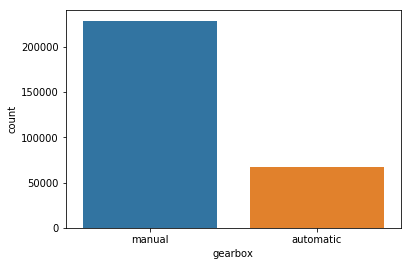

In [22]:
sns.countplot(x='gearbox',data=dfout)


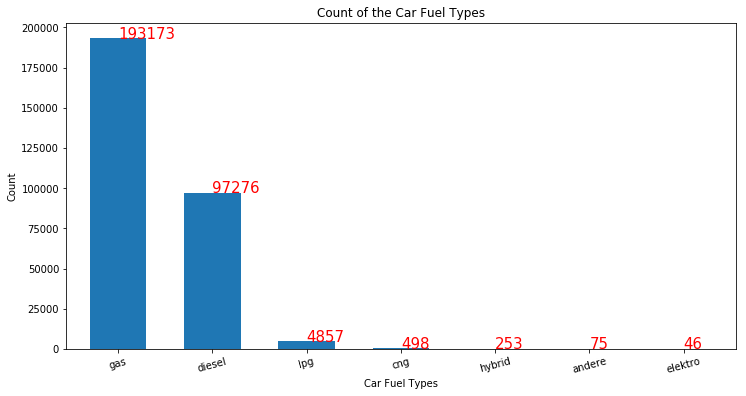

In [112]:
plt.subplots(figsize=[12,6])
ax=dfout.fuelType.value_counts().plot.bar(width=0.6)
#sns.countplot(x='fuelType',data=dfout)
plt.xticks(rotation=15)

for i, v in dfout.fuelType.value_counts().reset_index().iterrows():
    ax.text(i,v.fuelType,v.fuelType,color='red',fontsize=15)
    
plt.xlabel('Car Fuel Types')
plt.ylabel('Count')
plt.title('Count of the Car Fuel Types')
plt.show()

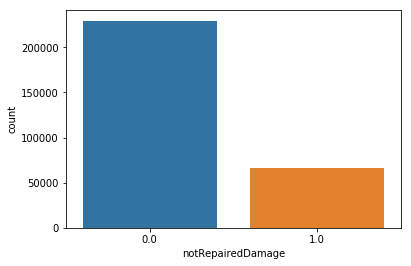

In [24]:
sns.countplot(x='notRepairedDamage',data=dfout)

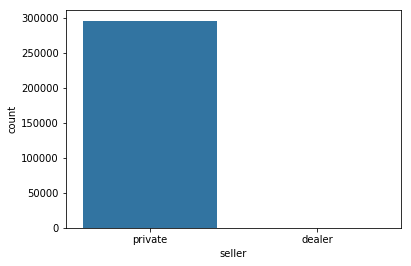

In [25]:
sns.countplot(x='seller',data=dfout)

We can drop 'seller' since almost 100% percent of 'seller' is private

In [26]:
dfout.drop('seller',axis=1,inplace=True)

In [27]:
dfout.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
dateCrawled,,,,,,,,,,,,
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,manual,190,grand,125000,diesel,audi,1.0,5
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,163,grand,125000,diesel,jeep,1.0,12
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manual,75,golf,150000,gas,volkswagen,0.0,15
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manual,69,fabia,90000,diesel,skoda,0.0,8
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,gas,bmw,1.0,21


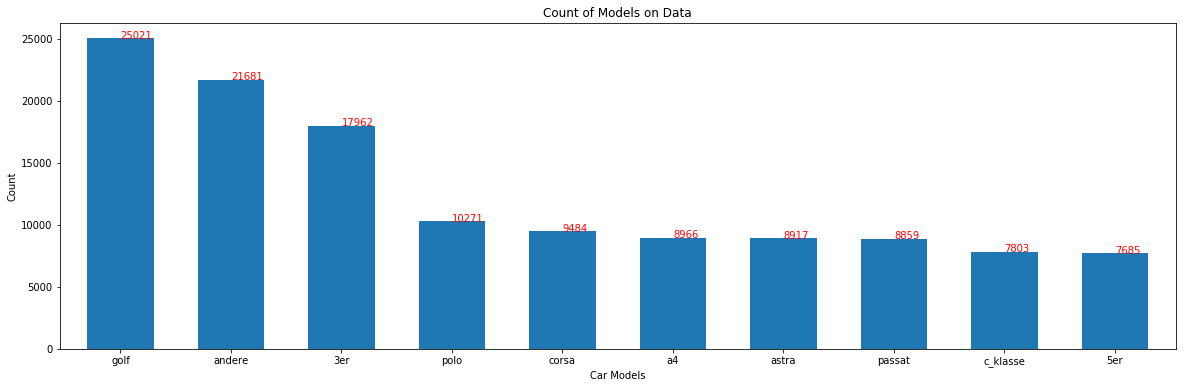

In [83]:
plt.subplots(figsize=[20,6])

ax=dfout.model.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.model.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.model, v.model, color='red')

plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Car Models')
plt.ylabel('Count')
plt.title('Count of Models on Data')
plt.show()

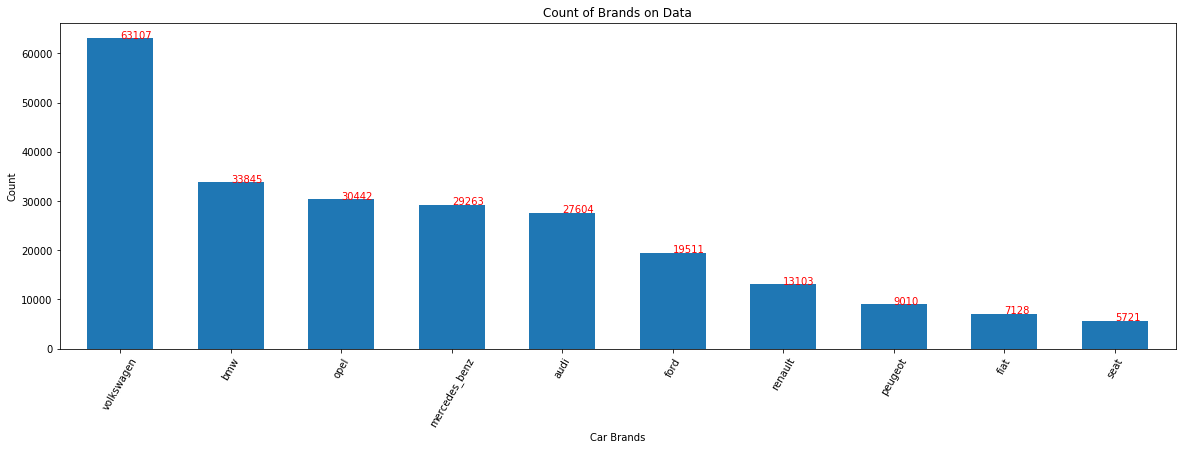

In [88]:
plt.subplots(figsize=[20,6])
ax = dfout.brand.value_counts().head(10).plot.bar(width=0.6)

for i, v in dfout.brand.value_counts().head(10).reset_index().iterrows():
    ax.text(i, v.brand, v.brand, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Brands')
plt.ylabel('Count')
plt.title('Count of Brands on Data')
plt.show()

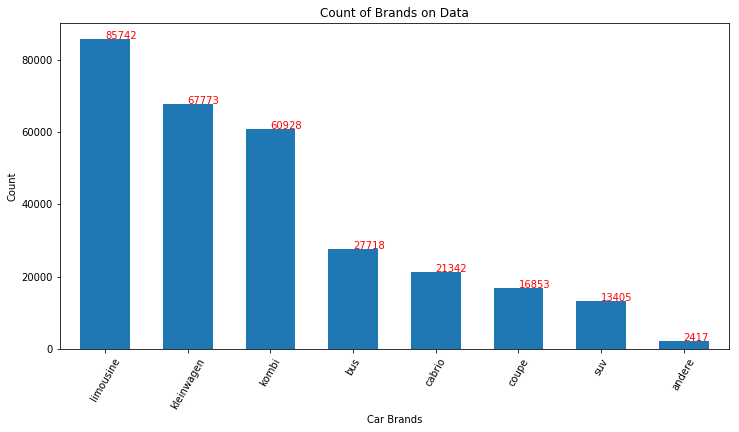

In [101]:
plt.subplots(figsize=[12,6])
ax = dfout.vehicleType.value_counts().plot.bar(width=0.6)
plt.xticks(rotation=15)

for i, v in dfout.vehicleType.value_counts().reset_index().iterrows():
    ax.text(i, v.vehicleType, v.vehicleType, color='red')

plt.xticks(rotation=60) # rotate ticks
plt.xlabel('Car Vehicle Types')
plt.ylabel('Count')
plt.title('Count of Vehicle Types on Data')
plt.show()

Volkswagen, BMW and Opel are the 3 most posted brands.

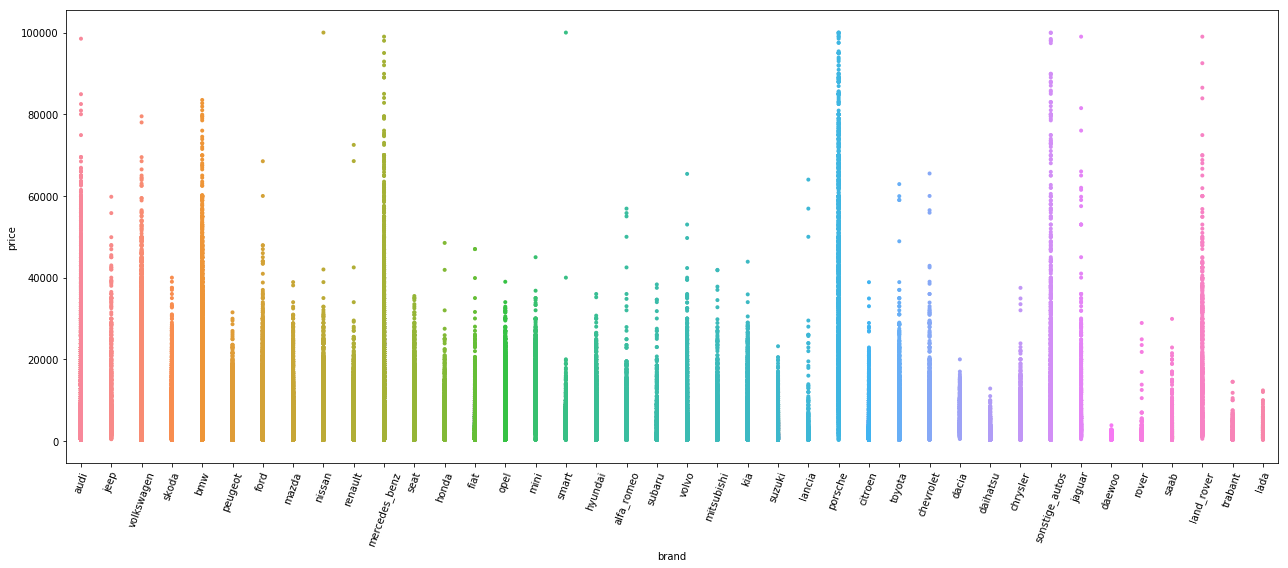

In [120]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(data=dfout, x_vars=['gearbox','model','brand','fuelType'],y_vars='price',markers='+')
plt.subplots(figsize=[18,8])
sns.stripplot(x='brand',y='price',data=dfout, size=4)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

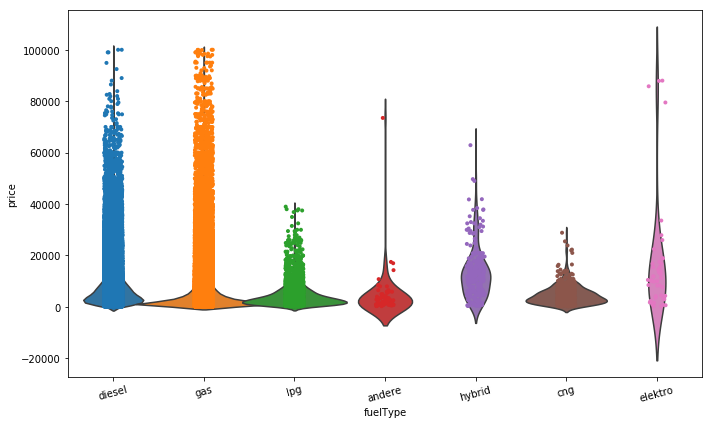

In [116]:
plt.subplots(figsize=[10,6])
sns.violinplot(x='fuelType',y='price',data=dfout,inner=None,width=1.5)
sns.stripplot(x='fuelType',y='price',data=dfout, size=4, jitter=True)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

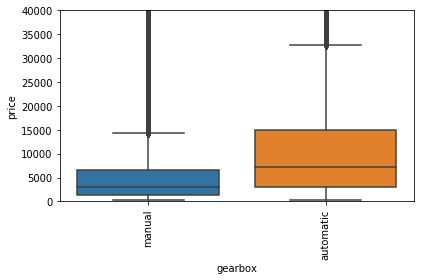

In [59]:
sns.boxplot(x='gearbox',y='price',data=dfout)
plt.xticks(rotation=90)
plt.ylim(0,40000)
plt.tight_layout()
plt.show()

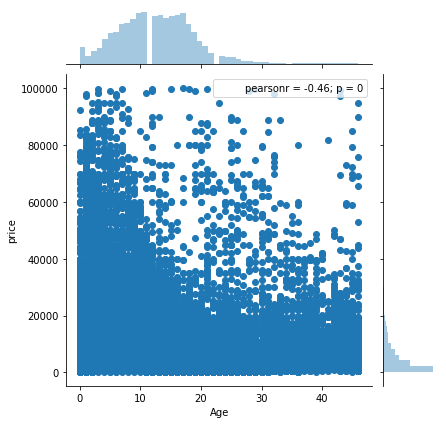

In [52]:
sns.jointplot(x='Age',y='price',data=dfout)
plt.show()

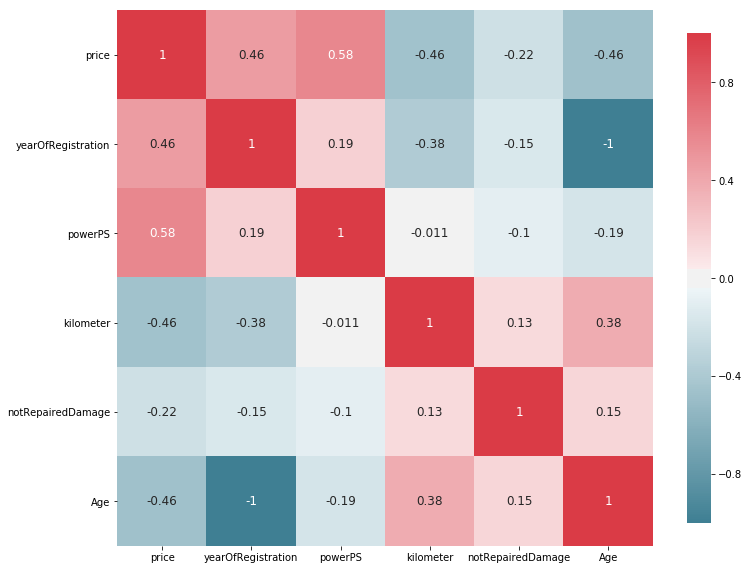

In [32]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(dfout)